# FF atop 2 Pt111

In [1]:
from pylab import *
import pandas as pd
from ase import Atoms, units
from ase.build import add_adsorbate, fcc111, molecule
from ase.visualize import view
from ase.data.pubchem import pubchem_atoms_search, pubchem_atoms_conformer_search
from ase.constraints import FixAtoms
from ase.io import write as wrt
import nglview
import os, sys
sys.path.append(os.path.abspath('../function_files/'))

from output_analysis import energy, force, ase_out, bond_length, save_images
from write_in import QE_input
from ase.io import espresso
from ase.io import read as rd

## Define Furfural molecule

In [2]:
fur = pubchem_atoms_conformer_search(cid = 7362)[0]

In [3]:
fur.center(vacuum = 10)
fur.rotate(-20,'z')

# Make adsorbed structures

## Import the optimized positions of the 3 layer platinum surface

In [4]:
FF_pt = rd('../Preferred Configurations/Pt111/Pt111.xyz', index = -1)
FF_pt

Atoms(symbols='Pt48', pbc=True, cell=[[11.087434113345987, 0.0, 0.0], [5.543717056672993, 9.60199512801046, 0.0], [0.0, 0.0, 24.526424302659752]], calculator=SinglePointCalculator(...))

## fix the bottom layer so that only the top 2 layers relax

In [5]:
const = FixAtoms(indices = arange(0,16))
FF_pt.set_constraint(const)

## add furfural in atop 2 position with ring over the surface atom and the aldehyde also atop

In [6]:
h = 2

In [7]:
add_adsorbate(FF_pt,fur, h, (4.6, 3.8))

In [8]:
view(FF_pt)

<Popen: returncode: None args: ['/usr/local/opt/python@3.11/bin/python3.11',...>

In [9]:
ads = nglview.show_ase(FF_pt)
ads

NGLWidget()

## write input file for structure to go to HPCC

In [10]:
in_file = '../data/QE_files/FFPt111_relax.in'

In [11]:
QE_input(in_file, FF_pt)

# Furfural on Pt Energy Analysis

In [12]:
output_file = '../data/QE_files/FFPt111_relax.out'

In [13]:
energy, traj = ase_out(output_file)

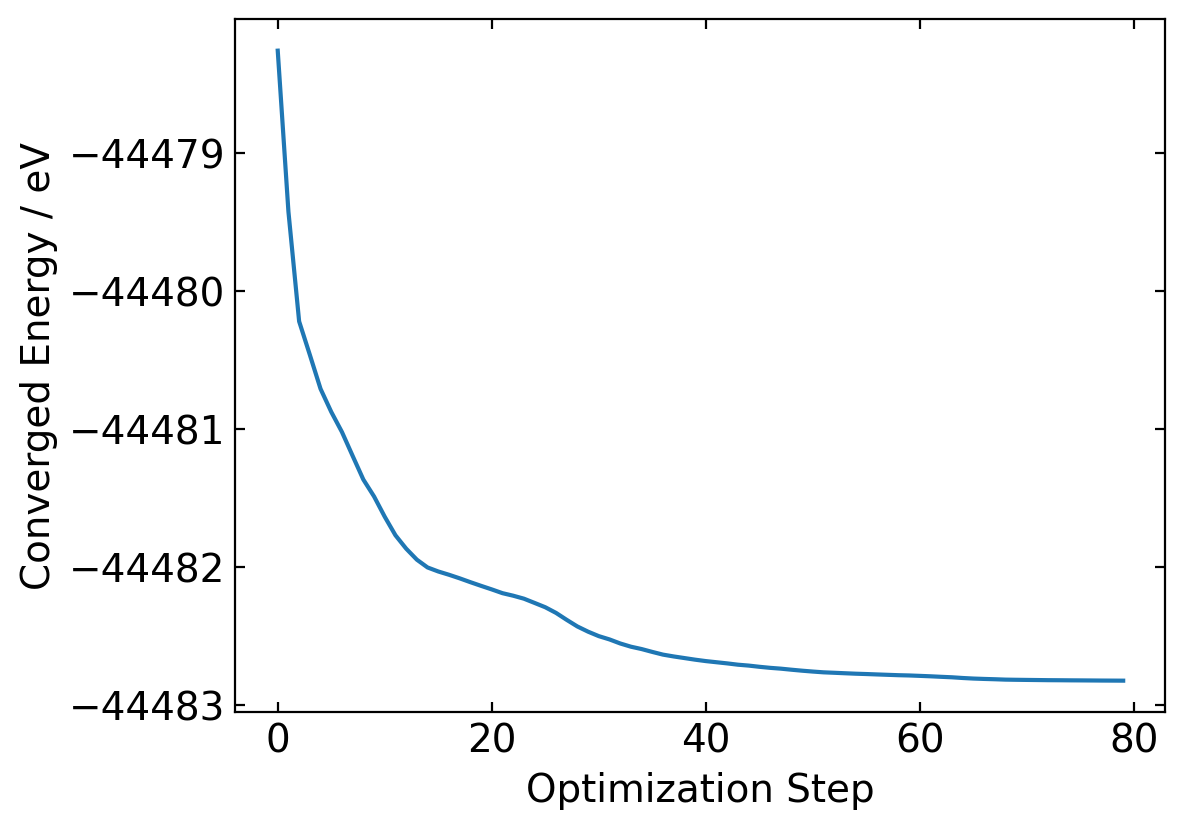

In [14]:
plot(energy)
ylabel('Converged Energy / eV')
xlabel('Optimization Step')
show()

# Adsorption Energy Calculation

In [15]:
# Import gas phase furfural and platinum slab optimized energy data
furf_es = pd.read_csv('../data/DFT_Es/gas/FF/FF_energy.csv')
furf_es.set_index("metric", inplace=True)

pt_es = pd.read_csv('../data/DFT_Es/surface/Pt111/platinum_energy.csv')
pt_es.set_index("metric", inplace=True)

In [16]:
# extract converged energies of FF(g) and Pt(111) slab
furf_e = furf_es.loc['Converged Energy / eV']['value']
pt_e = pt_es.loc['Converged Energy / eV']['value']

In [17]:
Eads = energy[-1] - furf_e - pt_e
print(f'The adsorption energy of furfural is {Eads:.2f} eV')

The adsorption energy of furfural is -1.26 eV


# View optimized structure

In [18]:
im = traj[-1]

In [19]:
view(im)
nglview.show_ase(im)

NGLWidget()